In [1]:
import numpy as np
import cv2 #open cv file
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#img = cv2.imread('./model/dataset/jean/10001.jpg')
#img.shape # will give x and y coordinates and RGB value

In [3]:
#plt.imshow(img)

In [4]:
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray.shape #gets rid of RGB value
#plt.imshow(gray, cmap='gray') #need the cmap to be gray alongside coloring it to gray

In [5]:
#open cv face detection article using haar cascades
#edge and line features
#area of eye tends to be darker than the area below, tip of nose is lighter
#we have different pre-trained classifier from haar cascades to detect various features

# will load in frontal face default and eye 

face_cascade = cv2.CascadeClassifier('./model/opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./model/opencv/haarcascade_eye.xml')

#faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#faces #returns array of faces -> 4 values (x,y, width, height)
# head starts at 86, 35 and starting from there the face is 107 wide and 107 long

In [6]:
# #put these values in an array
# (x,y,w,h) = faces[0]
# x,y,w,h

In [7]:
#draw a rectangle with a red color (255, 0, 0)
#rect dimension starts at x,y to x+w, y+h
#face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
#plt.imshow(face_img)

In [8]:
#now draw rectangle around eyes
#this code is from open cv doc

# cv2.destroyAllWindows()
# for (x,y,w,h) in faces: 
#     face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
#     roi_gray = gray[y:y+h, x:x+w]
#     roi_color = face_img[y:y+h, x:x+w] # region of intereset of the whole face (only red rectangle)
#     eyes = eye_cascade.detectMultiScale(roi_gray)
#     for(ex, ey, ew, eh) in eyes:
#         #doing rectangle in green color
#         cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

# plt.figure()
# plt.imshow(face_img, cmap ='gray')
# plt.show()

In [9]:
# %matplotlib inline
# plt.imshow(roi_color, cmap = 'gray')

In [10]:
#let's create a function to get input image and then get cropped version of face with eyes detected
def get_crop(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 3)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w] # region of intereset of the whole face (only red rectangle)
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for(ex, ey, ew, eh) in eyes:
            #doing rectangle in green color
            #cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            if len(eyes) >= 2:
                return roi_color
            

In [11]:
#generate cropped folder

path_to_data = "./model/dataset/"
path_to_cr_data = "./model/dataset/cropped/"

In [12]:
import os #helps interact with op system such as creating files/directories and managing them
img_dirs = []
# scan 
#scans directory and gets iterator of os.DirEntry objects corresponding to entries in the path
for entry in os.scandir(path_to_data):
    #check if entry is a directory or not
    if entry.is_dir():
        #if yes then append it's path
        img_dirs.append(entry.path)
img_dirs


['./model/dataset/derrick_rose',
 './model/dataset/klay_thompson',
 './model/dataset/kyrie_irving',
 './model/dataset/derrick_jones',
 './model/dataset/deaaron_fox',
 './model/dataset/cropped']

In [13]:
import shutil #lets you copy, create, moving files/folders
# if cropped folder exists delete it
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
#then create cropped folder directory
os.mkdir(path_to_cr_data)

In [14]:
#iterate through every single image in each img directory
#has cropped folder path for each of our five x-men
cropped_img_dirs = []
#x_men names
nba_names_dict = {}

for img_dir in img_dirs:
    count = 1
    #split our img directory names into three tokens: model, dataset, and x_men folder name
    #last index is -1 in python and that will be our x_men's name
    nba_name = img_dir.split('/')[-1]
    #create key using x_men name and initialize arrays for values
    if nba_name != 'cropped':
        nba_names_dict[nba_name] = []

    for entry in os.scandir(img_dir):
        if "cropped" in img_dir:
            continue
        print("entry", entry.path)
        # will return cropped image based on entry's path if image has 2 eyes
        # function will return none if it doesn't pass the two eyes and face values
        if '.DS_Store' in entry.path:
            continue
        roi_color = get_crop(entry.path)
        print("entry_post", entry.path)
        #plt.imshow(roi_color)
        
        if roi_color is not None:
            #name will be specific to that x_men_name
            cropped_folder = path_to_cr_data + nba_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
            #want to rename all files to simple pattern
            cropped_file_name = nba_name + str(count) + ".png"
            #want to make sure file_path is saved too
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            #write roi_color to that cropped_file_path
            cv2.imwrite(cropped_file_path, roi_color)
            nba_names_dict[nba_name].append(cropped_file_path)
            # will give you dictionary of {'scott' : ['./model/datasets/cropped/scott/scott1.png', etc., etc.]}
            count += 1



entry ./model/dataset/derrick_rose/10057.jpg
entry_post ./model/dataset/derrick_rose/10057.jpg
entry ./model/dataset/derrick_rose/10043.jpg
entry_post ./model/dataset/derrick_rose/10043.jpg
entry ./model/dataset/derrick_rose/10042.jpg
entry_post ./model/dataset/derrick_rose/10042.jpg
entry ./model/dataset/derrick_rose/10056.jpg
entry_post ./model/dataset/derrick_rose/10056.jpg
entry ./model/dataset/derrick_rose/10040.jpg
entry_post ./model/dataset/derrick_rose/10040.jpg
entry ./model/dataset/derrick_rose/10054.jpg
entry_post ./model/dataset/derrick_rose/10054.jpg
entry ./model/dataset/derrick_rose/10068.jpg
entry_post ./model/dataset/derrick_rose/10068.jpg
entry ./model/dataset/derrick_rose/10069.jpg
entry_post ./model/dataset/derrick_rose/10069.jpg
entry ./model/dataset/derrick_rose/10055.jpg
entry_post ./model/dataset/derrick_rose/10055.jpg
entry ./model/dataset/derrick_rose/10041.jpg
entry_post ./model/dataset/derrick_rose/10041.jpg
entry ./model/dataset/derrick_rose/10045.jpg
entry

In [15]:
#feature engineering - wavelet transformation 

import numpy as np
import pywt #py wavelet transform image
import cv2

#input image and do wavelet transformation on top of it -> return new image of wavelet transform
#differentiates eyes from nose and forehead -> almost looks like a black white image -> easy for computer to detect facial features


#signal processing, fourier transform, rep image as a frequency
#image can be a signal -> presented in spacial (x,y) domain or frequency domain
#fourier transform -> take complex signal and return basic signals that make that complex signal (think noise cancellation)

def w2d(img, mode='haar', level=1):
    imArray = img
    #datatype conversion, convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255

    #compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #process coefficients 
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0

    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    
    return imArray_H

In [16]:

# im_har = w2d(cropped_image, 'db1', 5)
# plt.imshow(im_har, cmap='gray')


class_dict = {}
count = 0
for nba_name in nba_names_dict.keys():
    class_dict[nba_name] = count
    count = count + 1

class_dict


{'derrick_rose': 0,
 'klay_thompson': 1,
 'kyrie_irving': 2,
 'derrick_jones': 3,
 'deaaron_fox': 4}

In [17]:
nba_names_dict = {}
for img_dir in cropped_img_dirs:
    nba_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)

    nba_names_dict[nba_name] = file_list
nba_names_dict


{'derrick_rose': ['./model/dataset/cropped/derrick_rose/derrick_rose13.png',
  './model/dataset/cropped/derrick_rose/derrick_rose7.png',
  './model/dataset/cropped/derrick_rose/derrick_rose6.png',
  './model/dataset/cropped/derrick_rose/derrick_rose12.png',
  './model/dataset/cropped/derrick_rose/derrick_rose10.png',
  './model/dataset/cropped/derrick_rose/derrick_rose4.png',
  './model/dataset/cropped/derrick_rose/derrick_rose5.png',
  './model/dataset/cropped/derrick_rose/derrick_rose11.png',
  './model/dataset/cropped/derrick_rose/derrick_rose15.png',
  './model/dataset/cropped/derrick_rose/derrick_rose1.png',
  './model/dataset/cropped/derrick_rose/derrick_rose14.png',
  './model/dataset/cropped/derrick_rose/derrick_rose16.png',
  './model/dataset/cropped/derrick_rose/derrick_rose2.png',
  './model/dataset/cropped/derrick_rose/derrick_rose3.png',
  './model/dataset/cropped/derrick_rose/derrick_rose17.png',
  './model/dataset/cropped/derrick_rose/derrick_rose19.png',
  './model/data

In [46]:
#raw image and wavelet transform image vertically stacked on each other

X = []
y = []
#iterate over our x_mens' names dictionary

for nba_name, training_files in nba_names_dict.items():
    # iterate over each image in each file
    for training_image in training_files:
        #convert to image bc training_image is path to image
        img = cv2.imread(training_image)
        if img is None:
            continue
        # all images are diff sizes, make them the same size
        scaled_raw_img = cv2.resize(img, (32, 32))
        #wavelet transform image
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))

        #vertically stakc using numpy
        # 32*32*3 bc colorful image
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3, 1), scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        #y is name of celebrity
        y.append(class_dict[nba_name])

[ WARN:0@337.413] global loadsave.cpp:241 findDecoder imread_('./model/dataset/cropped/deaaron_fox/deaaron_fox16.png'): can't open/read file: check file path/integrity
[ WARN:0@337.438] global loadsave.cpp:241 findDecoder imread_('./model/dataset/cropped/deaaron_fox/deaaron_fox23.png'): can't open/read file: check file path/integrity


In [47]:
# 58 by 4096
# convert to float
# every image is an array of 4096 data points
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(113, 4096)

In [48]:
#First Attempt: training a model with SVM rbf kernel tuned with heuristic finetuning

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix




In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

#want to scale X_train with standard scaler, then we create SVC model
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 15))])
#train model
pipe.fit(X_train, y_train)
#check score
pipe.score(X_test, y_test)

0.8478260869565217

In [50]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.90      0.75      0.82        12
           2       0.81      1.00      0.90        13
           3       0.67      0.67      0.67         3
           4       1.00      0.83      0.91        12

    accuracy                           0.85        46
   macro avg       0.82      0.82      0.81        46
weighted avg       0.86      0.85      0.85        46



Text(95.72222222222221, 0.5, 'Truth')

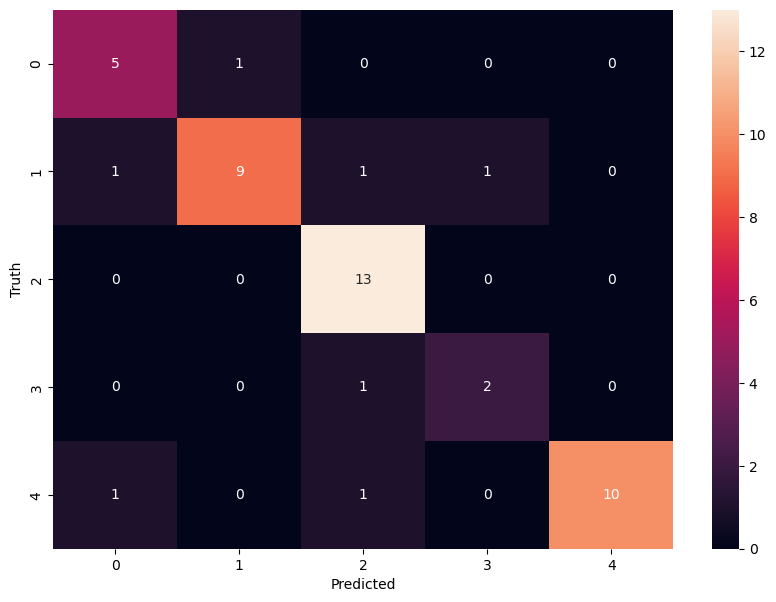

In [51]:
import seaborn as sn
from seaborn import heatmap
cm = confusion_matrix(y_test, pipe.predict(X_test))
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
# derrick_rose': 0,
#  'klay_thompson': 1,
#  'kyrie_irving': 2,
#  'derrick_jones': 3,
#  'deaaron_fox': 4}

In [52]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [53]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10, 100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10,15]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10,100]
            # 'logisticregression_solver': ['lbfgs','liblinear'],
            # 'logisticregression__max_iter' : [100,1000]
        }
    }
}

In [54]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=7, return_train_score=False)
    #internally gridsearch cv splits X-train to training and validations set, validation set for hyperparamater tuning
    # test performance of model use train set
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df
#results for validations et

,model,best_score,best_params
0,svm,0.685714,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.569841,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.730159,{'logisticregression__C': 1}


In [55]:
#now testing on test set
best_estimators['svm'].score(X_test, y_test) #0.65
best_estimators['random_forest'].score(X_test, y_test) #0.43
best_estimators['logistic_regression'].score(X_test, y_test) #0.8

0.8043478260869565

In [56]:
best_clf = best_estimators['logistic_regression']

Text(95.72222222222221, 0.5, 'Truth')

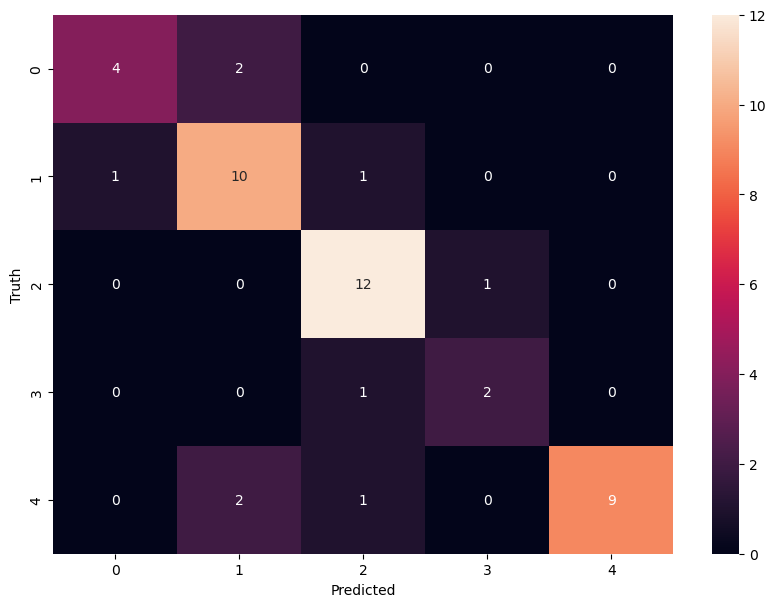

In [57]:
import seaborn as sn
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
# derrick_rose': 0,
#  'klay_thompson': 1,
#  'kyrie_irving': 2,
#  'derrick_jones': 3,
#  'deaaron_fox': 4}

In [58]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [59]:
import json
with open('class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))